In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

rcParams['figure.figsize'] = 16, 5

In [11]:
data = pd.read_csv("table.csv").T.iloc[:-5]

In [12]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
2013,0.48142,16.6431,5.94868e+07,0.284233,9.14742e+06,NaN,108.95,113.51,107.87,9.83151e+06,...,23.417,2.32906e+12,10.9762,3.36394,1.57959e+12,34.5709,7.20906,45.0638,81.299,2.57095e+08
2014,0.484164,16.8644,5.7979e+07,0.284233,9.14742e+06,NaN,114.95,117.03,108.75,9.83151e+06,...,23.1419,2.41255e+12,11.1564,3.18514,1.62053e+12,34.832,7.16069,45.2557,81.483,2.59623e+08
2015,0.474279,16.6454,5.812e+07,0.284233,9.14742e+06,NaN,114.12,116.61,108.91,9.83151e+06,...,21.0691,2.3153e+12,8.17133,2.93606,1.50257e+12,35.0962,7.11208,45.4523,81.671,2.62196e+08
2016,NaN,NaN,5.84541e+07,NaN,9.14742e+06,NaN,122.19,122.32,109.7,9.83151e+06,...,19.8726,2.25015e+12,7.71592,2.75595,1.45101e+12,35.3549,7.06513,45.666,81.862,2.64747e+08
2017,NaN,NaN,NaN,NaN,9.14742e+06,NaN,NaN,NaN,NaN,9.83151e+06,...,20.4028,2.4095e+12,10.5757,2.73335,1.54672e+12,35.6078,7.01962,45.8963,82.058,2.67279e+08


In [81]:
data.index = pd.to_datetime(data.index)
s = data[0].astype(float).interpolate(limit_direction='both')
# train = s[:-10]
# test = s[-10:]
train = s
s.tail()

2013-01-01    0.481420
2014-01-01    0.484164
2015-01-01    0.474279
2016-01-01    0.474279
2017-01-01    0.474279
Name: 0, dtype: float64

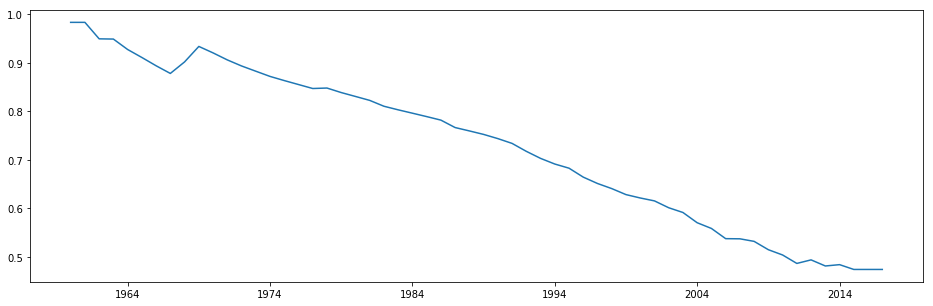

In [82]:
plt.plot(train)
# plt.plot(test)

In [83]:
def find_d(dat, k=0):
    adf = sm.tsa.adfuller(dat)
    if adf[0] > adf[4]['5%']:
        return find_d(dat.diff().interpolate(limit_direction='both'), k+1)
    else:
#         gr = sm.graphics.tsa.plot_acf(dat, lags=20)  # Автокорреляция
#         gr = sm.graphics.tsa.plot_pacf(dat, lags=20)  # Частичная автокорреляция
        return k

In [104]:
find_d(train)

1

In [85]:
%%time
try:
    m1 = ARIMA(train, order=(1, find_d(train), 1)).fit()
    # pred1 = m1.predict(start=test.index[0], end=test.index[-1], typ='levels')
    pred1 = m1.predict(start='2017-01-01', end='2018-01-01', typ='levels')
except:
    print('Может Лучше Не Надо ?\n')
    try:
        m1 = ARIMA(train, order=(1, 0, 1)).fit()
        # pred1 = m1.predict(start=test.index[0], end=test.index[-1])
        pred1 = m1.predict(start='2017-01-01', end='2018-01-01')
    except:
        print('Вот Тут Рил Лучше Не Надо !!!\n')
        m1 = ARIMA(train, order=(0, 0, 0)).fit()
        # pred1 = m1.predict(start=test.index[0], end=test.index[-1])
        pred1 = m1.predict(start='2017-01-01', end='2018-01-01')

CPU times: user 275 ms, sys: 8.06 ms, total: 283 ms
Wall time: 144 ms


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


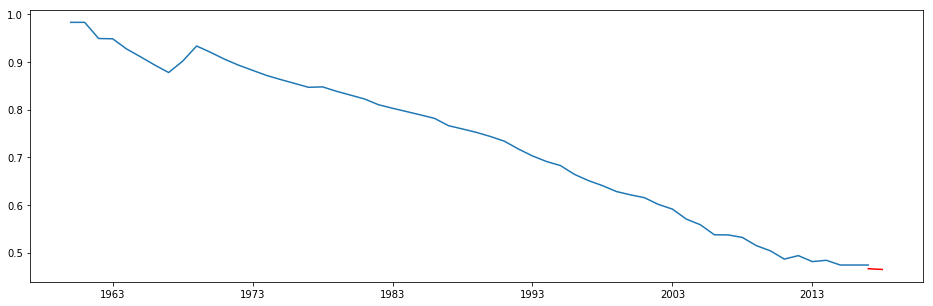

In [86]:
plt.plot(train, label='trian')
# plt.plot(test, label='test')
plt.plot(pred1, label='predict', c='r')